In [1]:
import numpy as np
import pandas as pd
import os
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors
import warnings
import scipy as sc
from astropy.io import fits
from astropy.table import Table, Column

hdulist = fits.open('../../Real Data/Healthy_Control_Data/Four_dots_blink_exp.fits')
data = hdulist[0].data

# Getting t data
t = np.linspace(0,500,500)

# Extracting x data and averaging
x = [ [] for i in range(46)]

for i in range(46):

    x[i] = data[1,i,0,:]

x1 = np.array(x)
x_data = np.sum(x1, axis=0)/46

# Extracting y data and averaging
y = [ [] for i in range(46)]

for i in range(46):

    y[i] = data[1,i,1,:]

y1 = np.array(y)
y_data = np.sum(y1, axis=0)/46

# Finding r data
r_data = np.sqrt(x_data**2 + y_data**2)

# Ignoring warnings printed to screen
warnings.filterwarnings("ignore")

In [2]:
### Function to compute takens emedded data for a specified delay and embedding dimension

def takens_embedding(data, delay, dimension):

    if delay*dimension > len(data):
        raise NameError('Delay times dimension exceeds length of data')       # Ensures that delay is not going to be too large such that it is larger than the data length 
    
    embedded_data = np.array([data[0:len(data)-delay*dimension]])

    for i in range(1, dimension):
        embedded_data = np.append(embedded_data, [data[i*delay:len(data) - delay*(dimension - i)]], axis=0)

    return embedded_data;

In [3]:
### Function to calculate percentage of false nearest neighbours for a range of embedding dimensions 

def false_nearest_neighbors(data,delay,embedding_dimension):

    embedded_data = takens_embedding(data, delay, embedding_dimension);

    nbrs = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(embedded_data.transpose())
    distances, indices = nbrs.kneighbors(embedded_data.transpose())

    epsilon = np.std(distances.flatten())
    nFalseNN = 0

    for i in range(0, len(data)-delay*(embedding_dimension+1)):
        if (0 < distances[i, 1]) and (distances[i, 1] < epsilon) and ( (abs(data[i+embedding_dimension*delay] - data[indices[i,1]+embedding_dimension*delay]) / distances[i,1]) > 10):
            nFalseNN += 1;
    return nFalseNN

[0.594, 0.094, 0.012, 0.0, 0.0, 0.0]


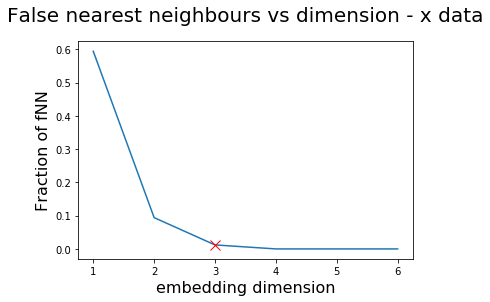

In [4]:
# False Nearest Neighbours for x data 

nFNN = []

for i in range (1,7):
    nFNN.append(false_nearest_neighbors(x_data,27,i) / len(x_data))

plt.plot(range(1,7),nFNN);
plt.plot(3,nFNN[2],'x', color='red', markersize=10)
plt.xlabel('embedding dimension', fontsize=16);
plt.ylabel('Fraction of fNN', fontsize=16);
plt.title('False nearest neighbours vs dimension - x data', fontsize=20, pad=20)

print(nFNN)

[0.5, 0.054, 0.002, 0.0, 0.0, 0.0]


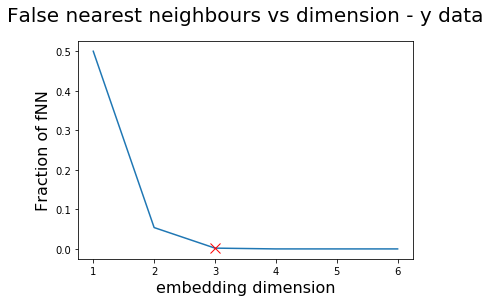

In [5]:
# False Nearest Neighbours for y data 

nFNN = []

for i in range (1,7):
    nFNN.append(false_nearest_neighbors(y_data,21,i) / len(y_data))

plt.plot(range(1,7),nFNN);
plt.plot(3,nFNN[2],'x', color='red', markersize=10)
plt.xlabel('embedding dimension', fontsize=16)
plt.ylabel('Fraction of fNN', fontsize=16)
plt.title('False nearest neighbours vs dimension - y data', fontsize=20, pad=20)

print(nFNN)

[0.488, 0.034, 0.0, 0.0, 0.0, 0.0]


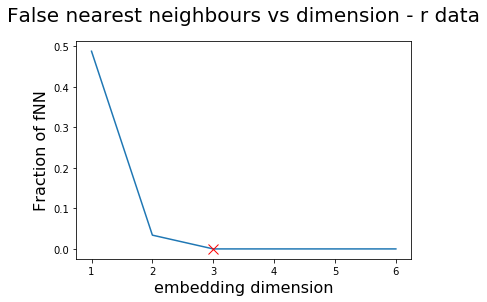

In [6]:
# False Nearest Neighbours for r data 

nFNN = []

for i in range (1,7):
    nFNN.append(false_nearest_neighbors(r_data,45,i) / len(r_data))

plt.plot(range(1,7),nFNN);
plt.plot(3,nFNN[2],'x', color='red', markersize=10)
plt.xlabel('embedding dimension', fontsize=16)
plt.ylabel('Fraction of fNN', fontsize=16)
plt.title('False nearest neighbours vs dimension - r data', fontsize=20, pad=20)

print(nFNN)

Text(0.5, 0.92, 'Phase space reconstruction for eye movement data - x data')

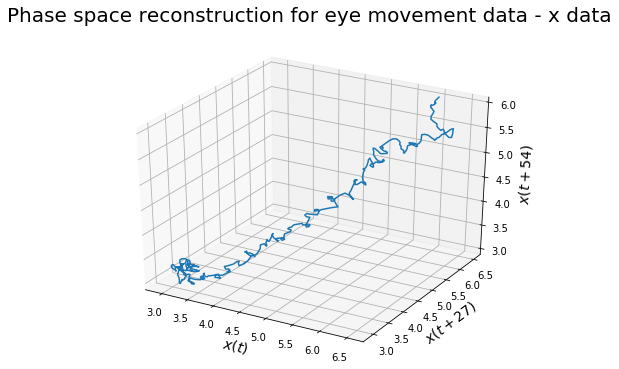

In [12]:
### Performing phase space reconstruction for x data 

embedded_x_final = takens_embedding(x_data, 27, 3)

fig = plt.figure()
fig.set_size_inches(8,6)
ax = plt.axes(projection='3d')
ax.plot3D(embedded_x_final[0,:], embedded_x_final[1,:], embedded_x_final[2,:])
ax.set_xlabel('$x(t)$', fontsize=14)
ax.set_ylabel('$x(t+27)$', fontsize=14)
ax.set_zlabel('$x(t+54)$', fontsize=14)
ax.set_title('Phase space reconstruction for eye movement data - x data', fontsize=20, pad=40)

Text(0.5, 0.92, 'Phase space reconstruction for eye movement data - y data')

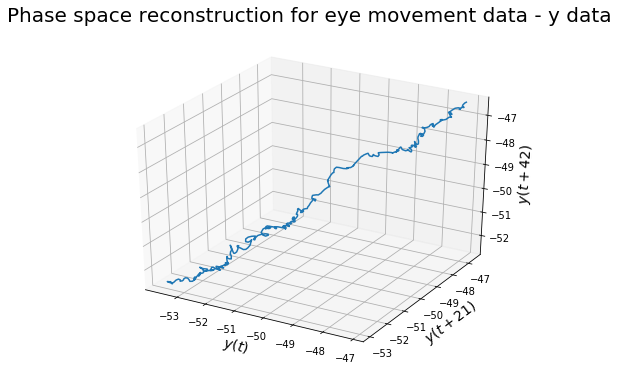

In [11]:
### Performing phase space reconstruction for y data 

embedded_y_final = takens_embedding(y_data, 21, 3)

fig = plt.figure()
fig.set_size_inches(8,6)
ax = plt.axes(projection='3d')
ax.plot3D(embedded_y_final[0,:], embedded_y_final[1,:], embedded_y_final[2,:])
ax.set_xlabel('$y(t)$', fontsize=14)
ax.set_ylabel('$y(t+21)$', fontsize=14)
ax.set_zlabel('$y(t+42)$', fontsize=14)
ax.set_title('Phase space reconstruction for eye movement data - y data', fontsize=20, pad=40)

Text(0.5, 0.92, 'Phase space reconstruction for eye movement data - r data')

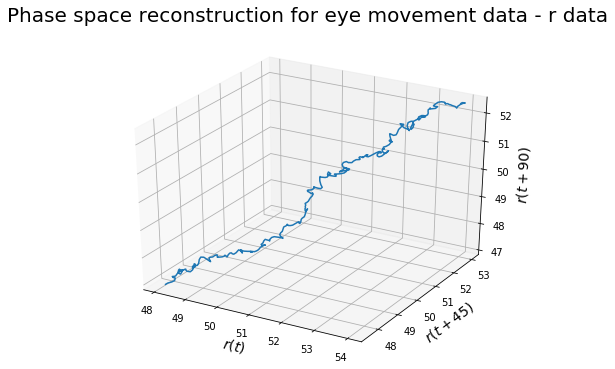

In [13]:
### Performing phase space reconstruction for r data 

embedded_r_final = takens_embedding(r_data, 45, 3)

fig = plt.figure()
fig.set_size_inches(8,6)
ax = plt.axes(projection='3d')
ax.plot3D(embedded_r_final[0,:], embedded_r_final[1,:], embedded_r_final[2,:])
ax.set_xlabel('$r(t)$', fontsize=14)
ax.set_ylabel('$r(t+45)$', fontsize=14)
ax.set_zlabel('$r(t+90)$', fontsize=14)
ax.set_title('Phase space reconstruction for eye movement data - r data', fontsize=20, pad=40)